In [1]:
import ryDsp

In [2]:
w= ryDsp.getWavFromYoutube() # info= 手嶌 葵《テルーの唄 》中日字幕

#url= 'https://youtu.be/jBzE8Sll_r4'  #info= もののけ姫
#url= 'https://youtu.be/m3OOoNE2_i4'   #info= 【Live】手嶌葵「ホームにて（中島みゆき）」2012
#url= 'https://youtu.be/-7aX47rrU5o' #info= 高畑充希 翻唱 中島美雪: ホームにて (在月台上) 日語歌詞中譯-有押韻
#url= 'https://youtu.be/Q3580ndaVII' # 井上あずみ - いつも何度でも (Always With Me)

#w= ryDsp.getWavFromYoutube(url)

# mp3File= 'L:\\中島美雪2020\\theDir2.mp3\\(BA.047_1977.06.25)_00041_ホームにて.mp3'
# sr, w= ryDsp.getWavFromFile_mp3(mp3File)
# ryDsp.playWav(w, sr)
# sr, w



url= https://youtu.be/HBUwoAoScaQ, info= 手嶌 葵《テルーの唄 》中日字幕


In [3]:
w

(44100,
 array([[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int16))

In [4]:
sr, wav= w

In [5]:
wav[:,0].shape

(11424768,)

In [6]:
wav[:,1].shape

(11424768,)

In [7]:
sr

44100

In [8]:
wav

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int16)

In [9]:
#
# plot the figure outside the Jupuyter such that we can control it by zoom in or out
#
%matplotlib qt 

import matplotlib.pyplot as plt
plt.plot(wav)


In [10]:
# ys ..... y-values series  +- 2**15 == 32767
# ts  .... time series
+2**15, -2**15

(32768, -32768)

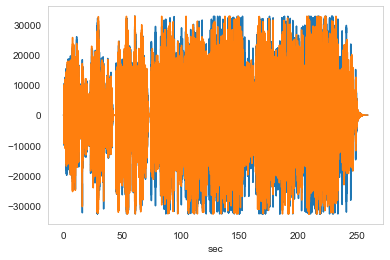

In [11]:
%matplotlib inline

ryDsp.plotWav(wav, sr=44100)

playWav, sr= 44100, duration= 10.000 sec


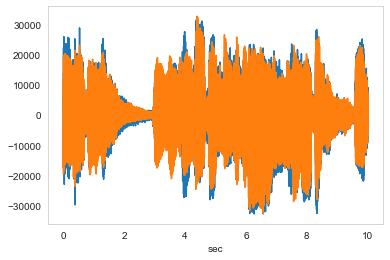

In [12]:
# segmentation

x= wav[
    sr*100: sr*110,  # using sr such that the time unit becomes "sec"
    :]

ryDsp.playWav(x)
ryDsp.plotWav(x,sr)

playWav, sr= 44100, duration= 20.000 sec


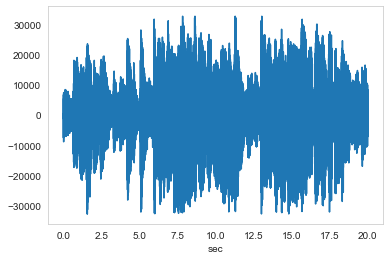

In [13]:
x= wav[sr*120:sr*140, 0]
ryDsp.playWav(x)
ryDsp.plotWav(x,sr)

playWav, sr= 44100, duration= 20.000 sec


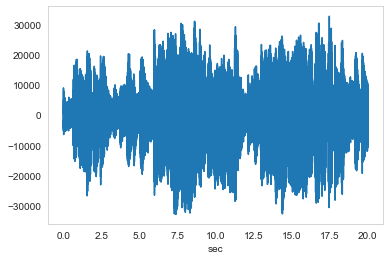

In [14]:
x= wav[sr*120:sr*140, 1]
ryDsp.playWav(x)
ryDsp.plotWav(x, sr)

playWav, sr= 88200, duration= 10.000 sec


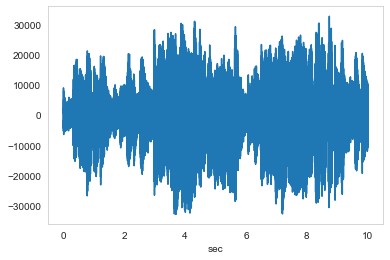

In [15]:
x= wav[sr*120:sr*140, 1]
ryDsp.playWav(x, sr*2)
ryDsp.plotWav(x, sr*2)

playWav, sr= 22050, duration= 40.000 sec


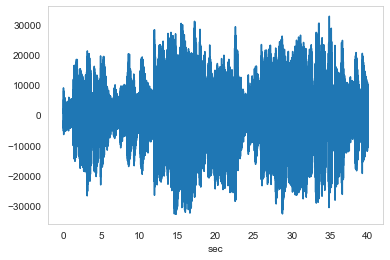

In [16]:
x= wav[sr*120:sr*140, 1]
ryDsp.playWav(x, sr//2)
ryDsp.plotWav(x, sr//2)

playWav, sr= 33075, duration= 26.667 sec


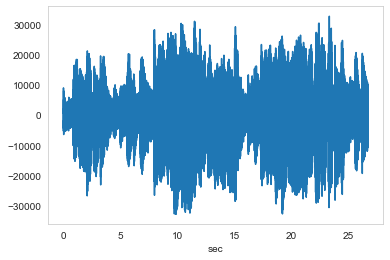

In [17]:
x= wav[sr*120:sr*140, 1]
ryDsp.playWav(x, sr*3//4)
ryDsp.plotWav(x, sr*3//4)

playWav, sr= 58800, duration= 15.000 sec


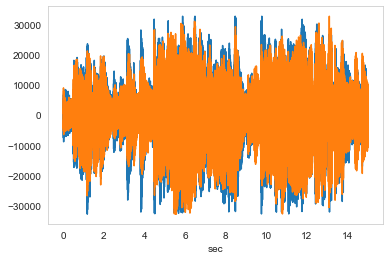

In [18]:
x= wav[sr*120:sr*140, :]
ryDsp.playWav(x, sr*4//3)
ryDsp.plotWav(x, sr*4//3)

playWav, sr= 50400, duration= 17.500 sec


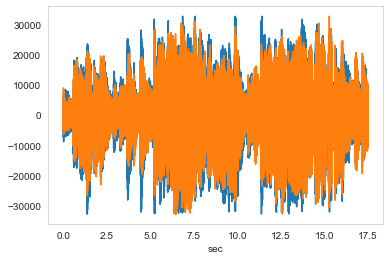

In [19]:
x= wav[sr*120:sr*140, :]
ryDsp.playWav(x, sr*8//7)
ryDsp.plotWav(x, sr*8//7)

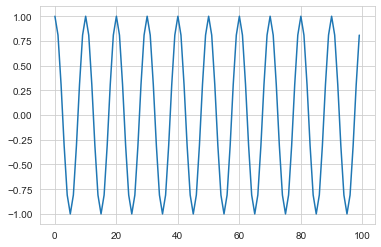

In [52]:
import matplotlib.pyplot as pl

π= np.pi

n= np.arange(0,100)

f= 10 #z
N= 100

w= 2 *π *f /N

x= np.cos(w*n)
n, x
pl.plot(n, x)

10

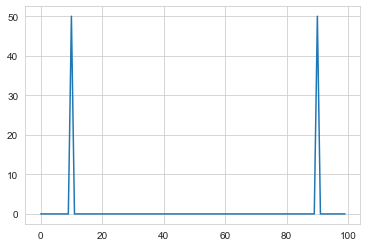

In [61]:
import numpy.fft as npfft

X= npfft.fft(x)

X1= np.abs(X)
pl.plot(n, X1)
X1.argmax()


In [20]:
#%%
import numpy.fft as npfft

def fftWav(x, nFFT= 1024):
    
    assert x.ndim == 1
    
    x= zeroPaddingWav(x, nFFT)
    z= x.reshape(-1, nFFT)
    Z=  numpy.fft.fft(z)
    
    return Z


playWav, sr= 44100, duration= 20.000 sec


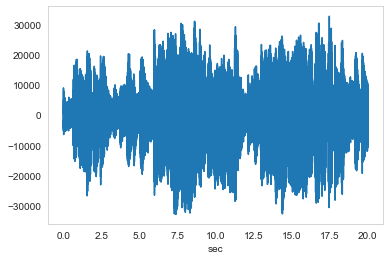

In [21]:
x= wav[sr*120:sr*140, 1]
ryDsp.playWav(x)
ryDsp.plotWav(x, sr)

In [22]:
X= npfft.fft(x)
x.shape

(882000,)

playWav, sr= 44100, duration= 20.000 sec


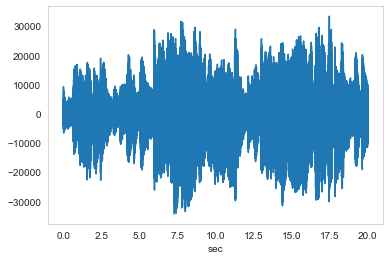

In [23]:
X= npfft.fft(x)
x.shape

X.shape

N= X.shape[0]

X[N//32:-N//32]= 0

#X[:N//32]= 0
#X[-N//32:]= 0

xx= npfft.ifft(X)
xx.shape
ryDsp.playWav(xx.real,sr)
ryDsp.plotWav(xx.real,sr)

highpass, cutoff_freq= 5000 Hz
playWav, sr= 44100, duration= 20.000 sec


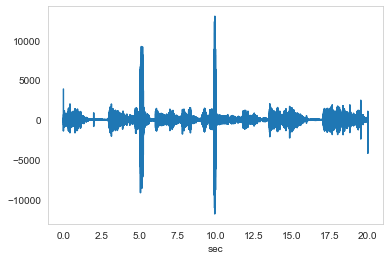

In [24]:
import numpy.fft

def filterWav(x, 
              sr= 44100, 
              cutoff_freq= 1000, 
              lowpass=True):
    '''
    cutoff_ratio: the ratio of sampling frequency to cut off
    the max is 1/2
    '''
    
    assert x.ndim == 1 # currently only deal with mono(ch=1) audio
    
        
    assert cutoff_freq/sr < 1/2
    assert cutoff_freq/sr > 0
        
    X= numpy.fft.fft(x)
    
    N= X.shape[0]
    cutoff= int(N*cutoff_freq/sr)

    if lowpass==True:
        print(f'lowpass, cutoff_freq= {cutoff_freq} Hz')
        X[cutoff:-cutoff]= 0
    else:
        print(f'highpass, cutoff_freq= {cutoff_freq} Hz')
        X[:cutoff]=  0
        X[-cutoff:]= 0

    xx= numpy.fft.ifft(X)
    xx= xx.real
    return xx

x=wav[sr*100:sr*120,0]
xx= filterWav(x, cutoff_freq= 5000, lowpass=False)
ryDsp.playWav(xx,sr)
ryDsp.plotWav(xx,sr)

lowpass, cutoff_freq= 3000 Hz
highpass, cutoff_freq= 1500 Hz
playWav, sr= 44100, duration= 20.000 sec


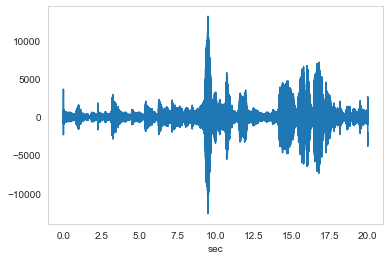

In [25]:
x=  wav[sr*200:sr*220,0]
xx= x.copy()
xx= filterWav(xx,   sr, cutoff_freq= 3000, lowpass=True)
xx= filterWav(xx,   sr, cutoff_freq= 1500, lowpass=False)
ryDsp.playWav(xx,sr)
ryDsp.plotWav(xx,sr)

In [26]:
xx.real[0]

-858.033506425508

In [27]:
sr, x= ryDsp.genSinSignal()

In [28]:
sr

44100

In [29]:
x

array([ 0.00000000e+00,  6.26497429e-02,  1.25053344e-01, ...,
       -1.25053344e-01, -6.26497429e-02,  6.27613383e-14])

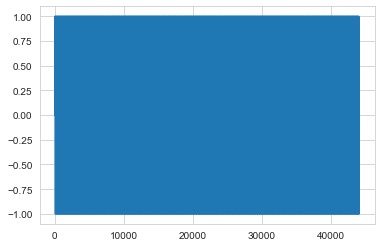

In [30]:
plt.plot(x)

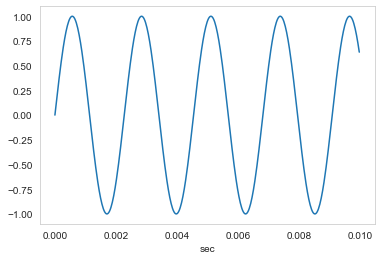

In [31]:
ryDsp.plotWav(x[sr*0:int(sr*0.01)], sr)

In [32]:
sr, x= ryDsp.genSinSignal(T= 3, f= 440)
ryDsp.playWav(x, sr)

playWav, sr= 44100, duration= 3.000 sec


In [33]:
sr, x0= ryDsp.genSinSignal(T= 3, f= 220) # A
#ryDsp.playWav(x, sr)

In [34]:
sr, x1= ryDsp.genSinSignal(T= 3, f= 330)  # E
#ryDsp.playWav(x, sr)

In [35]:
sr, x2= ryDsp.genSinSignal(T= 3, f= 440)  # a
#ryDsp.playWav(x, sr)

In [36]:
x0.shape

(132300,)

In [37]:
x1.shape

(132300,)

In [38]:
x2.shape

(132300,)

In [39]:
import numpy as np

x= np.concatenate([x0,x1,x2])


In [40]:
ryDsp.playWav(x)

playWav, sr= 44100, duration= 9.000 sec
